## CSCI-UA 9473 Introduction to Machine Learning 
### Assignment 1: Gradient descent


__Given date:__ Sept 14

__Due date:__ Sept 23

__Total:__ 10pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

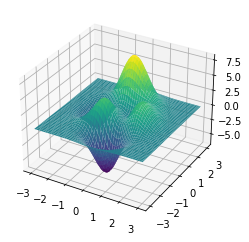

In [20]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x1, x2 = np.meshgrid(x, y)

F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



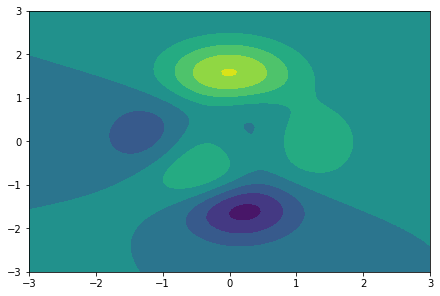

In [22]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
# plt.scatter(0.23, -1.62,c='r',marker='X')
# plt.show()

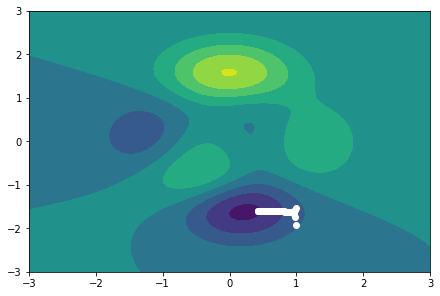

In [54]:
# put your solution here

learning_rate = 0.001
x1_array = []
x2_array = []
epochs = 100
E = np.e
x1_start = 1
x2_start = -1
for i in range(epochs):
    grad_x1 = (-2*E**(-2*x1_start - x1_start**2 - (1 + x2_start)**2)*(9*(1 - 2*x1_start**2 + x1_start**3)*E**(2*x1_start) - (1 + x1_start)*E**(2*x2_start) + (3 - 51*x1_start**2 + 30*x1_start**4 + 30*x1_start*x2_start**5)*E**(1 + 2*x1_start + 2*x2_start)))/3
    grad_x2 = (2*E**(-2* - x1_start**2 - (1 + x2_start)**2)*(-9*(-1 + x1_start)**2*(1 + x2_start)*E**(2*x1_start) + x2_start*E**(2*x2_start) - 3*x2_start*(-2*x1_start + 10*x1_start**3 + 5*x2_start**3*(-5 + 2*x2_start**2))*E**(1 + 2*x1_start + 2*x2_start)))/3.
    x1_start -= learning_rate * grad_x1
    x2_start -= learning_rate * grad_x2
    x1_array.append(x1_start)
    x2_array.append(x2_start)

fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(x1_array, x2_array, c='white')
plt.show()
    




### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression prox2_startlem x2_startelow, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\x2_startegin{align}
\ell(\x2_startoldsymx2_startol \x2_starteta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\x2_starteta_0 +\x2_starteta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start x2_starty x2_startuilding the matrix $\tilde{\x2_startoldsymx2_startol X}$ with
\x2_startegin{align}
\tilde{\x2_startoldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[ 0.97443208  0.65285064  0.3312692   0.00968775 -0.31189369 -0.63347513
 -0.95505658 -1.27663802 -1.59821946 -1.91980091]
[ 0.73000946  0.55249267  0.15641275  0.06406835 -0.49696955 -0.2893733
 -0.74307335 -1.20712107 -1.52584659 -1.5797145 ]


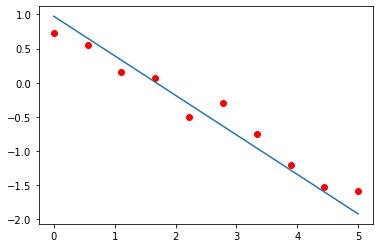

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()




[ 0.77610817 -0.48400787]


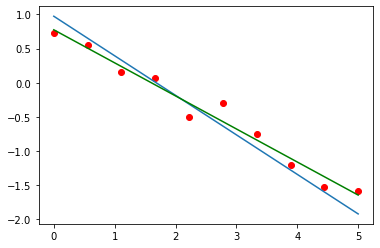

In [58]:
# put your code here
Xtilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1,1)))
Xtilde_transpose = np.transpose(Xtilde)
Xtilde_transpose_dot_Xtilde = Xtilde_transpose.dot(Xtilde)

tnoisy_transpose = np.transpose(tnoisy)
Xtilde_transpose_dot_t_noisy_transpose = Xtilde_transpose.dot(tnoisy_transpose)

beta_learned = np.linalg.inv(Xtilde_transpose_dot_Xtilde).dot(Xtilde_transpose_dot_t_noisy_transpose)
t_predict = beta_learned[0] + beta_learned[1] * x

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(x, t_predict, c='green')
plt.show()


